This is a simple introduction to pdblp, a wrapper for easy Bloomberg and pandas integration

In [1]:
%pylab inline
import pdblp

Populating the interactive namespace from numpy and matplotlib


The project [pdblp](https://github.com/MatthewGilbert/pdblp) borrows heavily from the package by kyuni22, which is available [here](https://github.com/kyuni22/pybbg).

The package currently wraps the Historical Data Request service and the Intraday Bar Request service. More details of the Open API can be found [here](http://www.bloomberglabs.com/api/documentation/)

Before running this notebook you need to have access to a Bloomberg terminal on a windows machine and download and install pdblp

```
git clone https://github.com/MatthewGilbert/pdblp.git
cd pdblp
pip install -e pdblp
```

In [2]:
con = pdblp.BCon(debug=False)
con.start()

In [3]:
print(con.bdh.__doc__)


        Get tickers and fields, return pandas dataframe with column MultiIndex
        of tickers and fields

        Parameters
        ----------
        tickers: {list, string}
            String or list of strings corresponding to tickers
        flds: {list, string}
            String or list of strings corresponding to FLDS
        start_date: string
            String in format YYYYmmdd
        end_date: string
            String in format YYYYmmdd
        


In [4]:
df = con.bdh(['SPY Equity', 'IWM Equity'], 'PX_LAST', '20150103', '20150619')

In [5]:
df.head()

ticker,IWM Equity,SPY Equity
field,PX_LAST,PX_LAST
2015-01-05,117.34,201.72
2015-01-06,115.31,199.82
2015-01-07,116.73,202.31
2015-01-08,118.71,205.90
2015-01-09,117.57,204.25


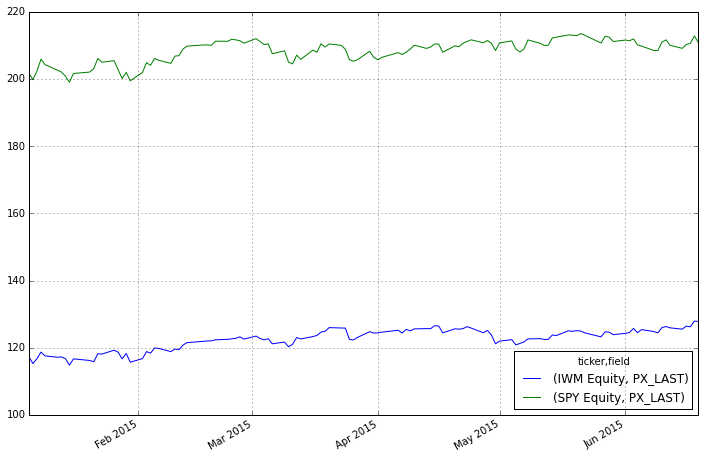

In [6]:
df.plot(figsize=(12,8))

The bdh() function call returns a MultiIndex by default to be a consistent type in case multiple fields are requested

In [7]:
df2 = con.bdh(['SPY Equity', 'IWM Equity'], ['PX_LAST', 'VOLUME'], '20150103', '20150619')

In [8]:
df2.head()

ticker     IWM Equity           SPY Equity           
field         PX_LAST    VOLUME    PX_LAST     VOLUME
2015-01-05     117.34  51141891     201.72  169632646
2015-01-06     115.31  67446040     199.82  209151408
2015-01-07     116.73  32252095     202.31  125346709
2015-01-08     118.71  28361730     205.90  147217784
2015-01-09     117.57  26975175     204.25  158567288

In [9]:
print(con.bdib.__doc__)


        Get Open, High, Low, Close, Volume, for a ticker.
        Return pandas dataframe

        Parameters
        ----------
        ticker: string
            String corresponding to ticker
        startDateTime: string
            UTC datetime in format YYYY-mm-ddTHH:MM:SS
        endDateTime: string
            UTC datetime in format YYYY-mm-ddTHH:MM:SS
        eventType: string {TRADE, BID, ASK, BID_BEST, ASK_BEST, BEST_BID,
                           BEST_ASK}
            Requested data event type
        interval: int {1... 1440}
            Length of time bars
        


In [10]:
df3 = con.bdib('SPY Equity', '2015-06-19T09:30:00', '2015-06-19T15:30:00',
               eventType='TRADE', interval=15)

In [11]:
df3.head()

,open,high,low,close,volume
2015-06-19 13:30:00,211.460,211.520,211.090,211.3573,9061632
2015-06-19 13:45:00,211.360,211.405,211.100,211.3600,4212470
2015-06-19 14:00:00,211.350,211.550,211.320,211.4299,3659095
2015-06-19 14:15:00,211.430,211.550,211.325,211.4550,2186267
2015-06-19 14:30:00,211.459,211.520,211.260,211.3300,2352812


Simple typos can result in somewhat cryptic errors since the service returns a well format response which fails far downstream when a pandas object is attempted to be instantiated, as can be seen below.

In [12]:
con.bdh('SPY Equitys', 'PX_LAST', '20150103', '20150619')

TypeError: Cannot infer number of levels from empty list

There is a debug flag which prints the request/response to stdout so this type of error can be easily found.

In [13]:
con.debug = True

In [14]:
con.bdh('SPY Equitys', 'PX_LAST', '20150103', '20150619')

DEBUG:root:Sending Request:
 HistoricalDataRequest = {
    securities[] = {
        "SPY Equitys"
    }
    fields[] = {
        "PX_LAST"
    }
    periodicityAdjustment = ACTUAL
    periodicitySelection = DAILY
    startDate = "20150103"
    endDate = "20150619"
}

DEBUG:root:Message Received:
 HistoricalDataResponse = {
    securityData = {
        security = "SPY Equitys"
        eidData[] = {
        }
        sequenceNumber = 0
        securityError = {
            source = "809::bbdbh6"
            code = 15
            category = "BAD_SEC"
            message = "Unknown/Invalid securityInvalid Security [nid:809] "
            subcategory = "INVALID_SECURITY"
        }
        fieldExceptions[] = {
        }
        fieldData[] = {
        }
    }
}



TypeError: Cannot infer number of levels from empty list